# Question 2: Gaussian Mixture Models Clustering


Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

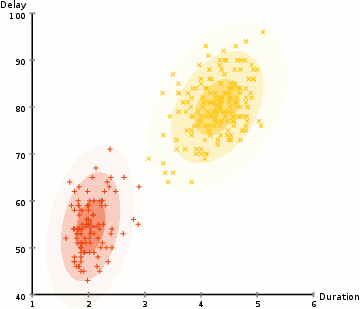

## The EM algorithm for GMM


## The E-Step

We can write the Gaussian Mixture distribution as a combination of Gaussians with weights equal to π as below. Where K is the number of Gaussians we want to model.

### Gaussian Mixture Distribution

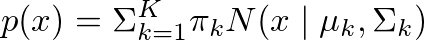

### Posterior Responsibilities using Bayes Rule
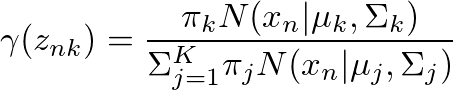

## The M-Step

After calculating our posterior all we need to do is get an estimate of the parameters of each Gaussian defined by the equations below and then evaluate the log-likelihood. These two steps are then repeated until convergence.

### Mean of the Gaussians

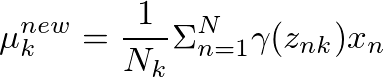

###  Covariance of the Gaussians

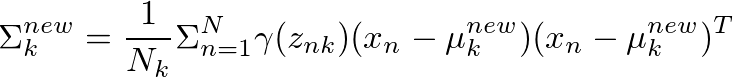

###  Weights

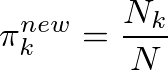

### Sum of responsibilities in each Gaussian k
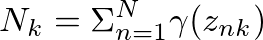

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pickle
from scipy.stats import norm
np.random.seed(0)
import math
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
    #"""initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)

        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        
        #Calculation of gamma variable

        sum_list=[]
        for i in range(len(r)):
            sum_list.append(np.sum(r,axis=1)[i])
            
        for i in range(len(r)):
            sum_=sum_list[i]
            r[i] = r[i]/sum_

        return r,sum_list
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=np.array([[r[i][0],r[i][1],r[i][2]]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g.flatten(),c=c)
    
    def run(self):
        log_likelihoods = []
        for iter in range(self.iterations):
            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            
            r,sum_list = self.calculate_prob(r)

            """Plot the data"""
            self.plot(r)
            
            """M-Step"""
            """calculate m_c"""
            
            m_c = []
            # m_c = sum(gamma)
            for c in range(len(r[0])):
                m=np.sum(r[:,c])
                m_c.append(m)
            
            """calculate pi_c"""
            # pi = sum(gamma)/N
            pi_c = []
            for m in m_c:
                pi_c.append(m/float(len(r))) 
            self.pi=pi_c
            
            """calculate mu_c"""
            
            mu_c=[]
            # mean = sum(gamma*X)/sum(gamma)
            for i in range(len(r[0])):
                mu_c.append(np.sum(r[:,i]* self.X,axis=0) / m_c[i])
            self.mu = mu_c


            """calculate var_c"""
            var_c = []
            for c in range(len(r[0])):
                # Here, it is sd =  sqrt((gamma*(X-mean)).T.(X-mean)/sum(gamma))
                var_c.append(math.sqrt((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c]))))
            self.var=var_c
            plt.show()
            # Here, it is standard deviation but not variance
            log_likelihoods.append(np.sum(np.log(sum_list)))
            
            
        return self.mu,self.var,log_likelihoods,self.iterations







In [2]:
dataset1=load("Datasets/Question-2/dataset1.pkl")
dataset2=load("Datasets/Question-2/dataset2.pkl")
dataset3=load("Datasets/Question-2/dataset3.pkl")
#print(dataset1)
data=np.stack((dataset1,dataset2,dataset3)).flatten()
# print(len(data),len(dataset1),len(dataset2),len(dataset3))
# print(data)

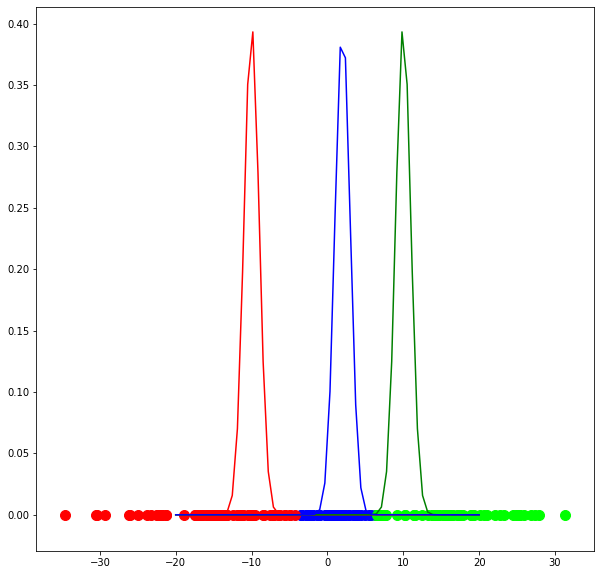

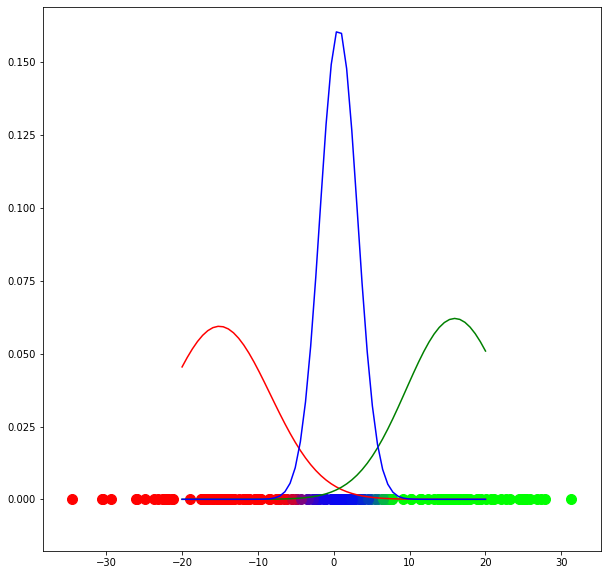

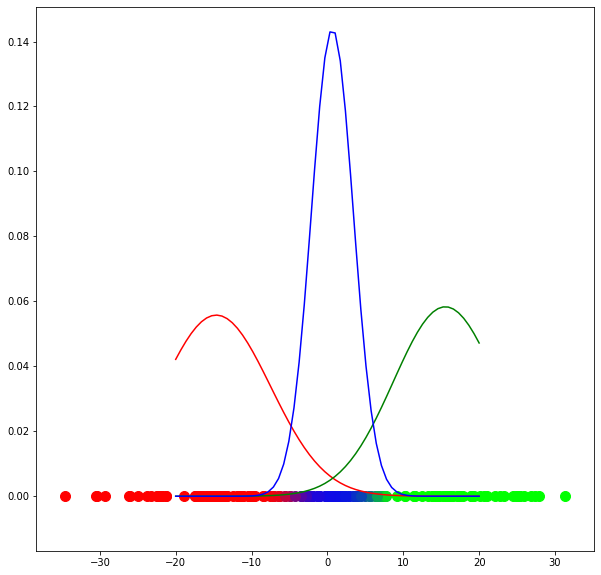

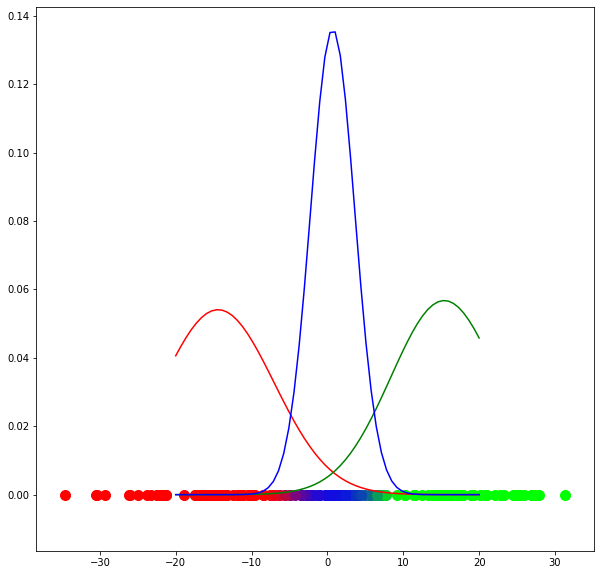

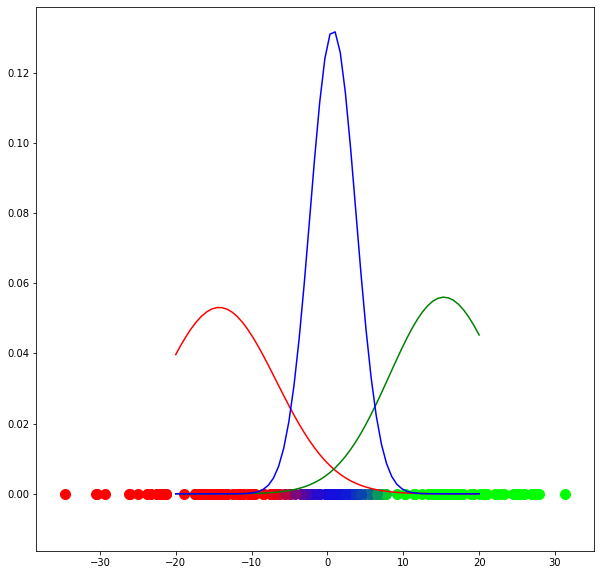

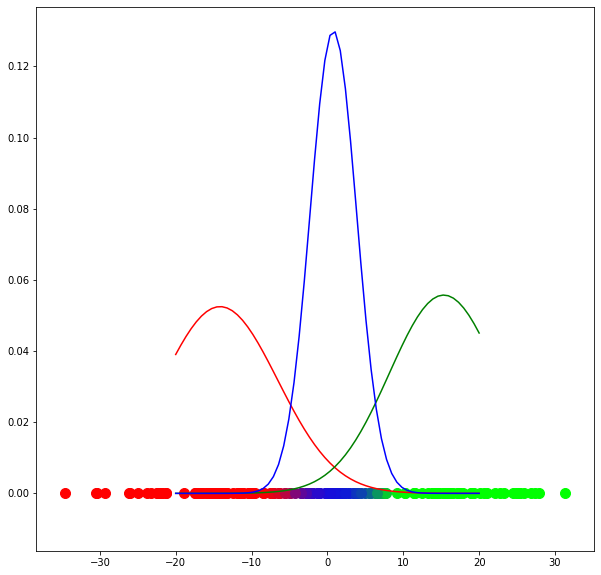

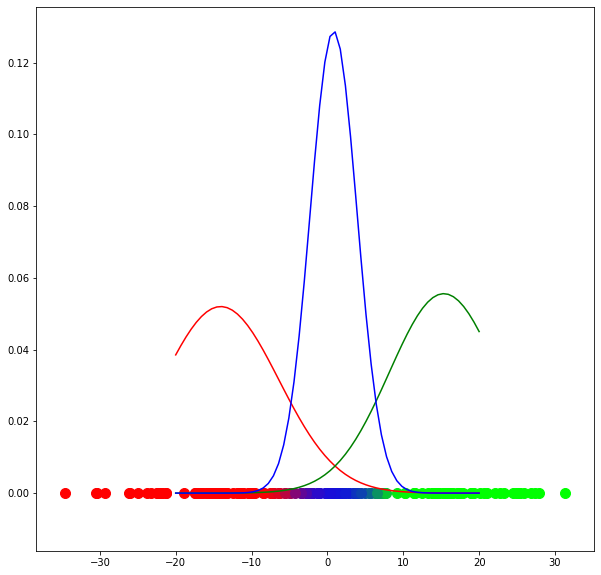

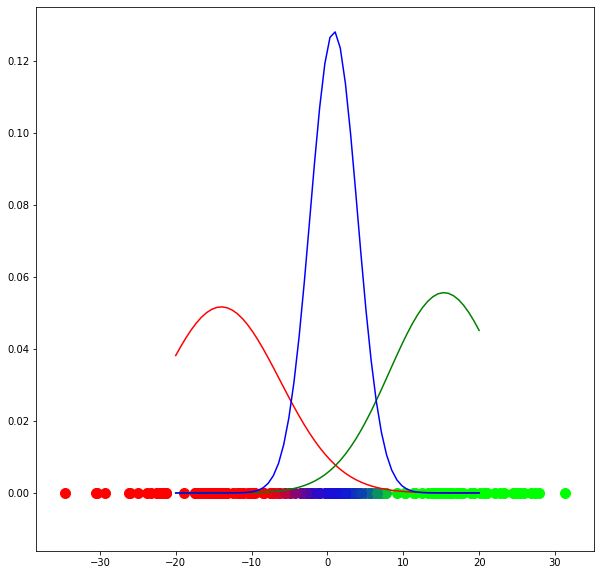

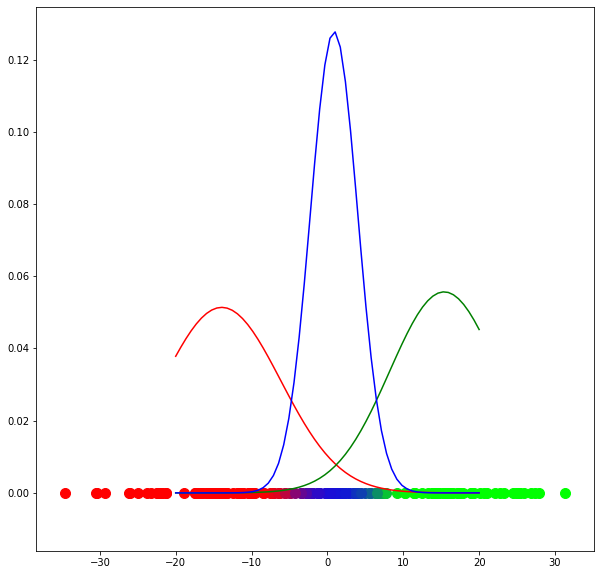

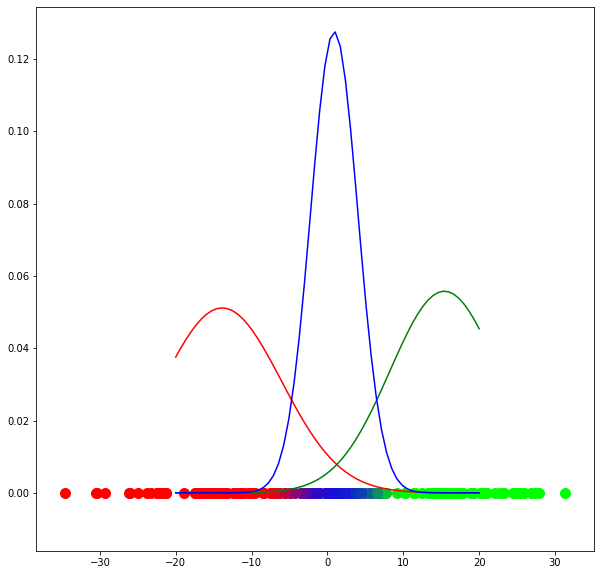

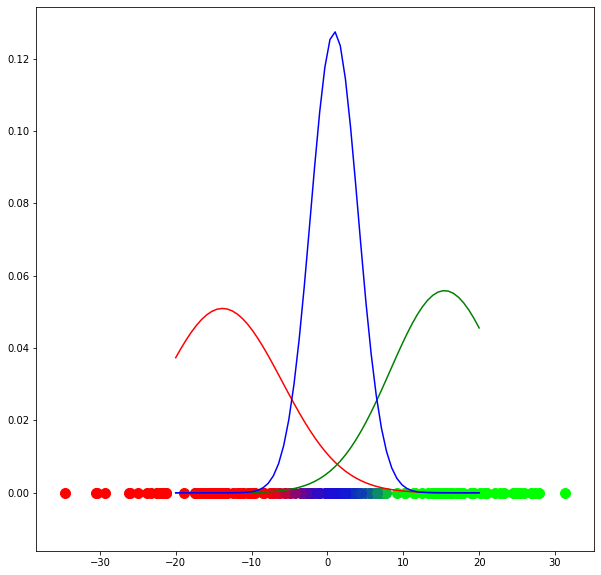

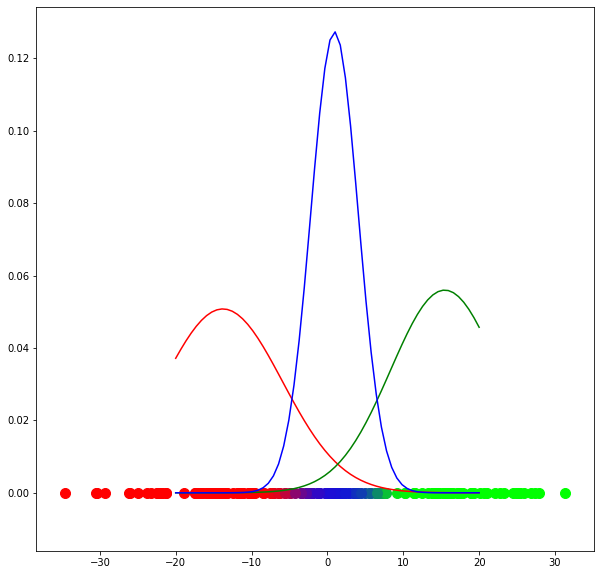

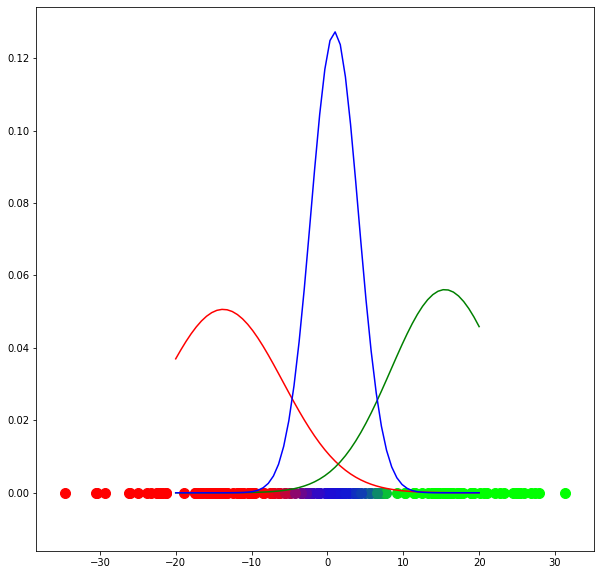

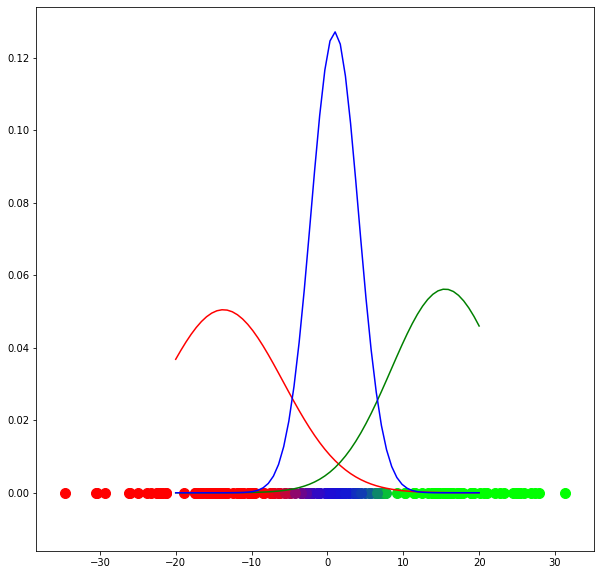

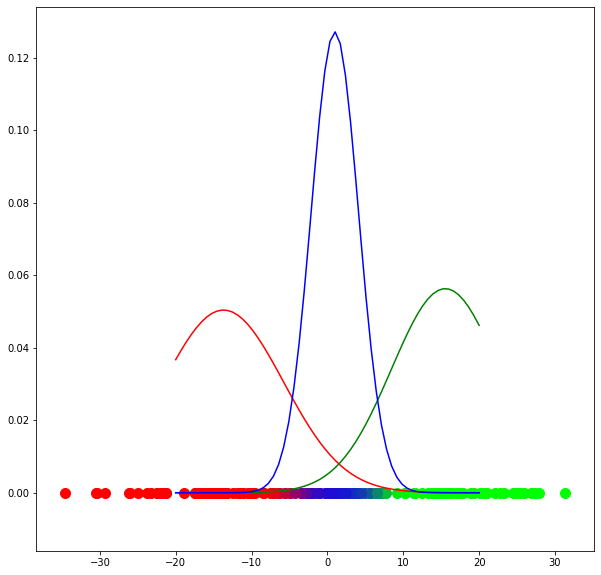

In [3]:
g = GMM1D(data,15,[-10,10,2],[1/3,1/3,1/3],[1,1,1])
mean,var,log_likelihoods,iterations=g.run()

###  Marginal Likelihood: This is what we want to maximise
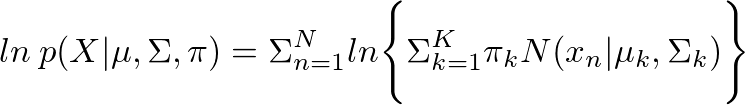

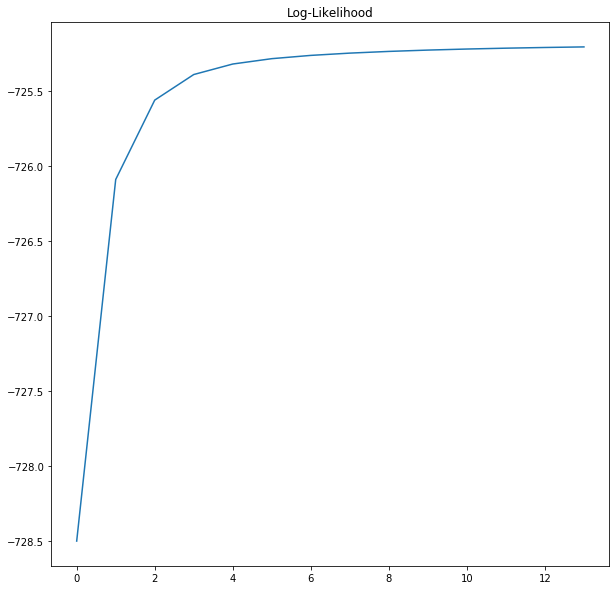

In [4]:
#plotting the loglikelihood graph
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(range(0,iterations-1,1),log_likelihoods[1:])
plt.show()


In [5]:
mean,var

([-13.672647653401386, 15.555669339141854, 0.990936021746087],
 [7.930682875168789, 7.072475156816006, 3.139749388518006])

### So, It took around 2 iterations to converge when we have taken mean=[-10,10,2], pi=[1/3,1/3,1/3], var=[1,1,1]

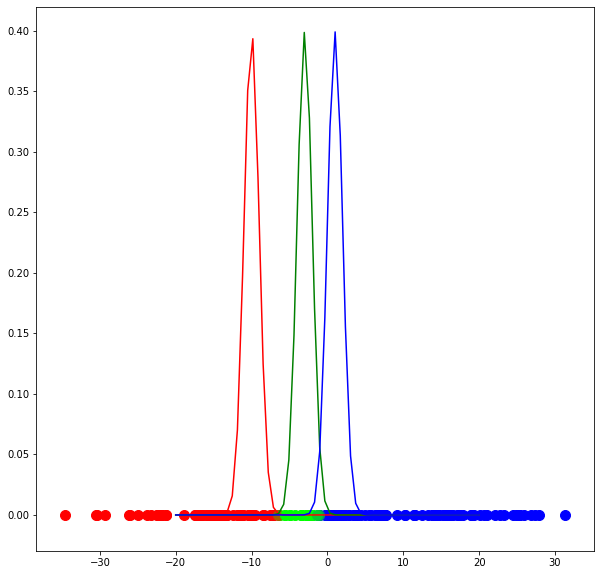

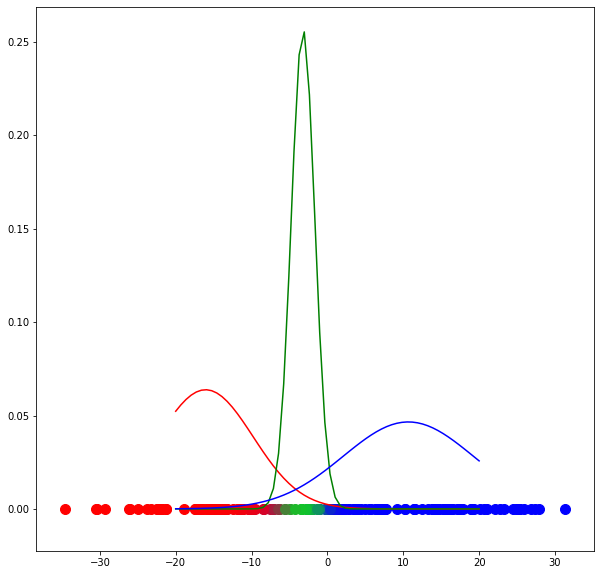

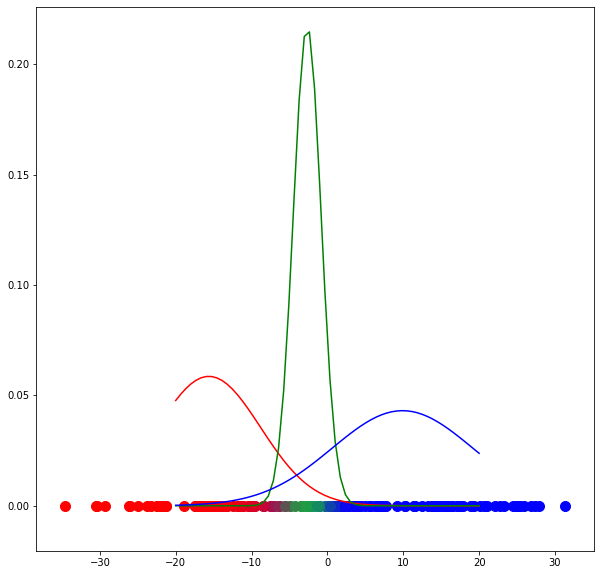

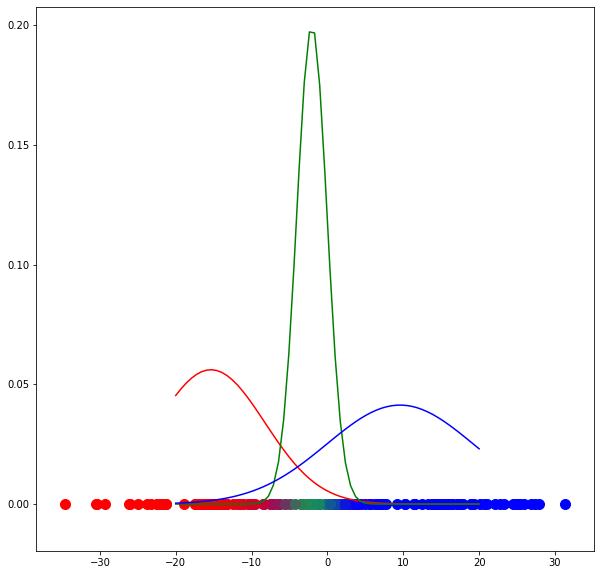

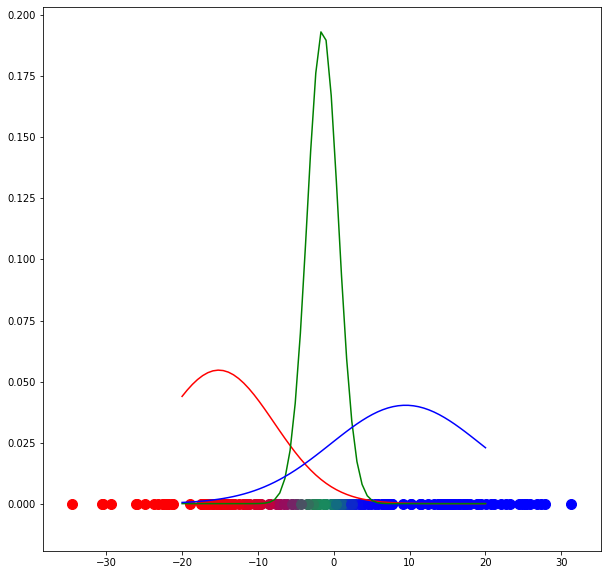

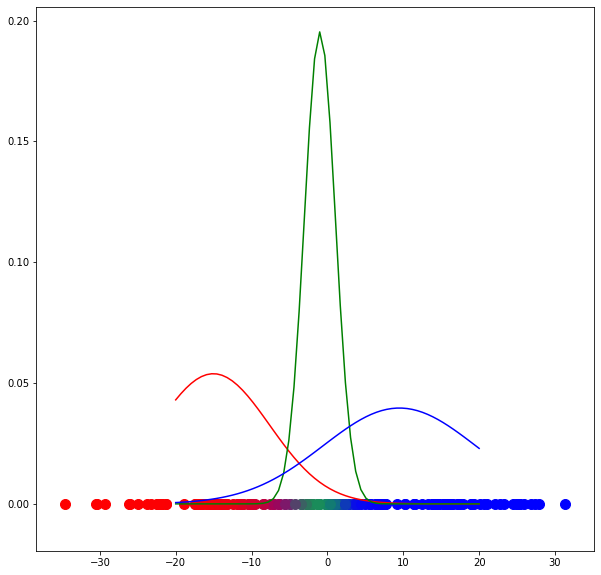

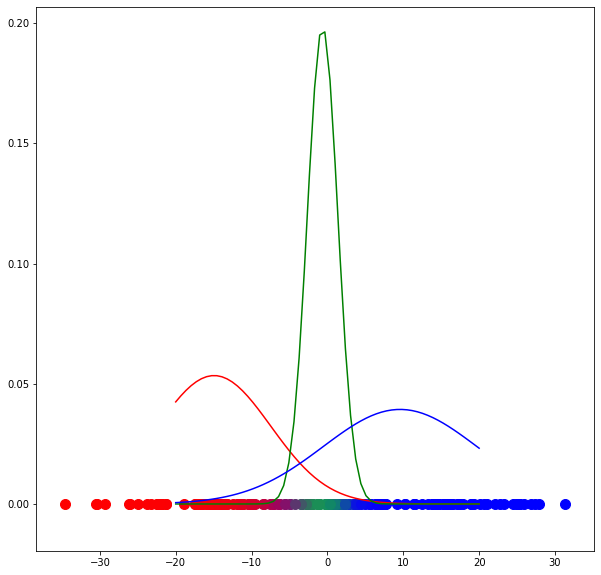

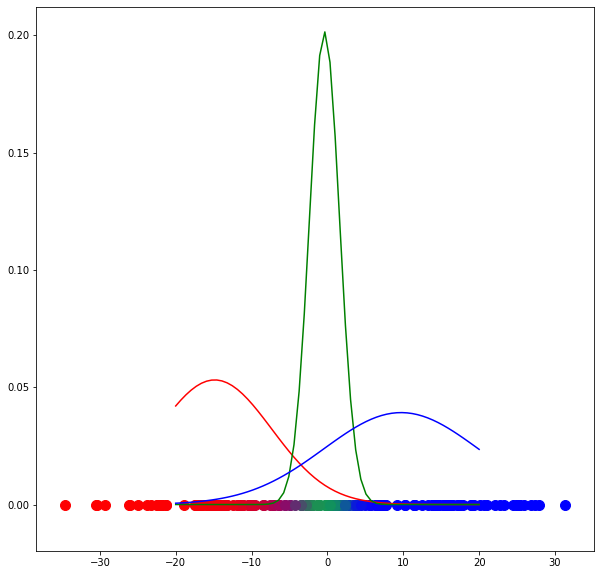

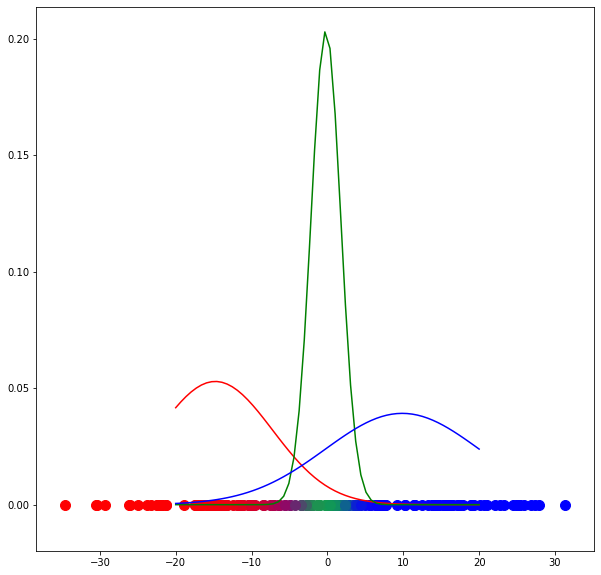

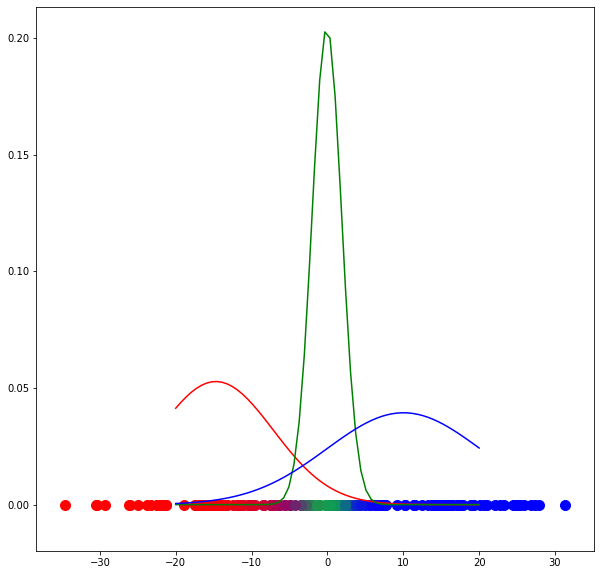

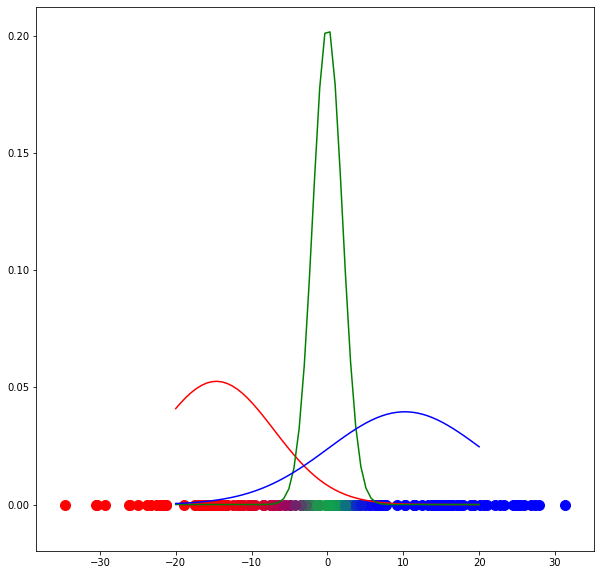

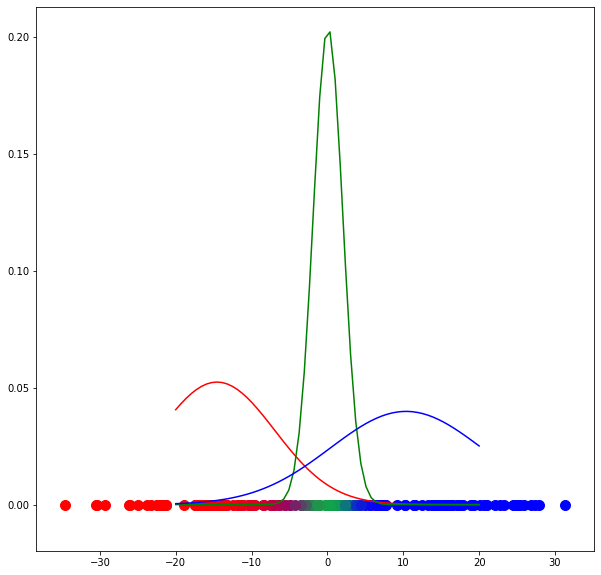

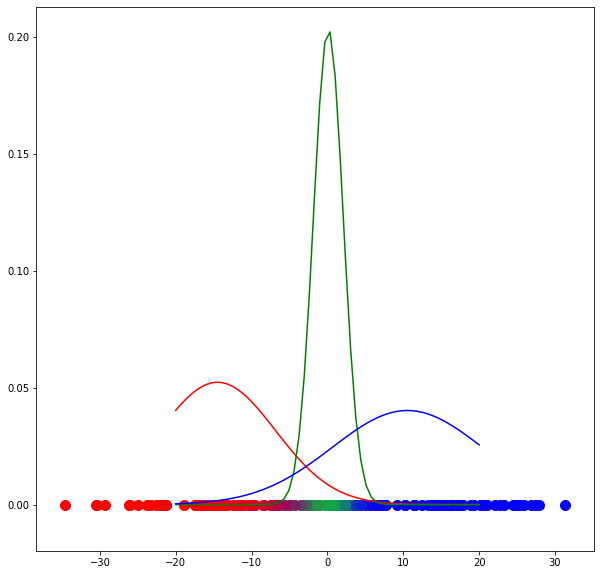

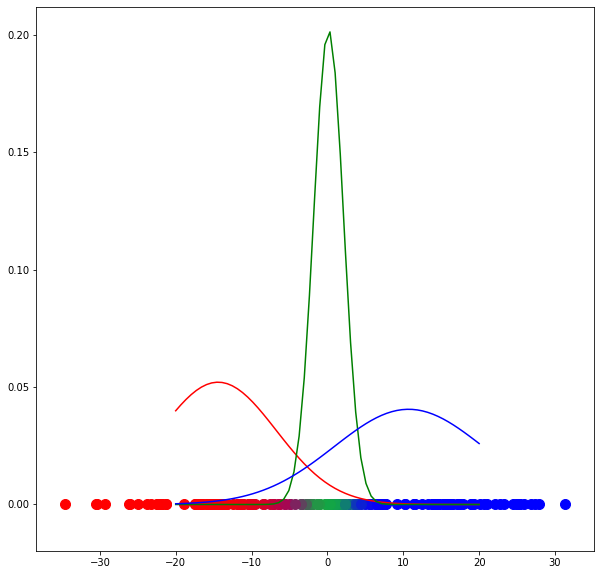

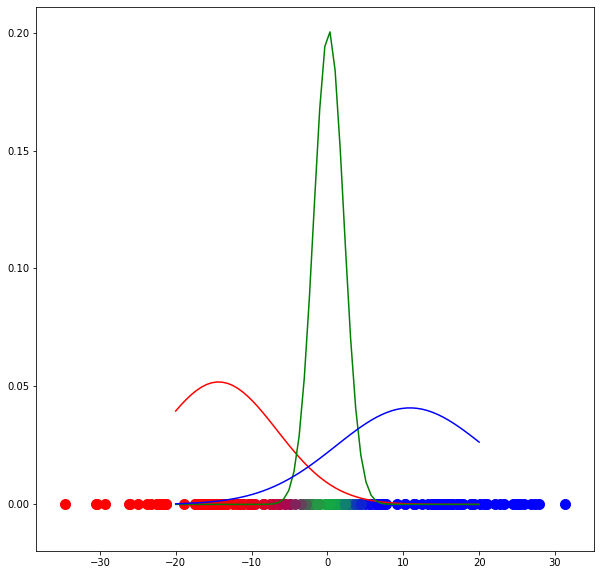

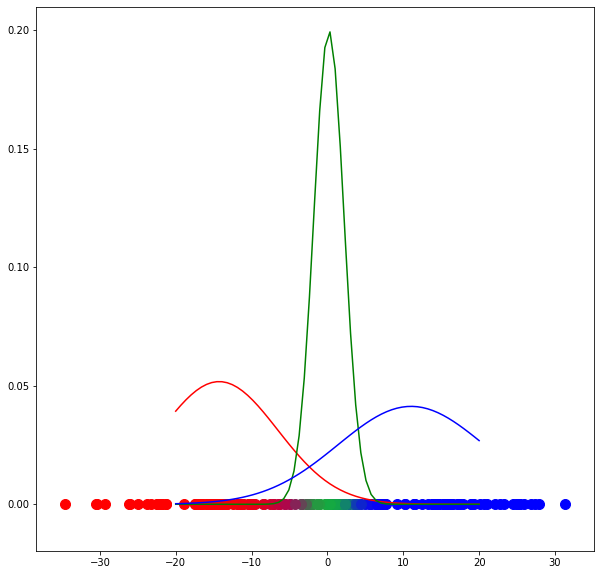

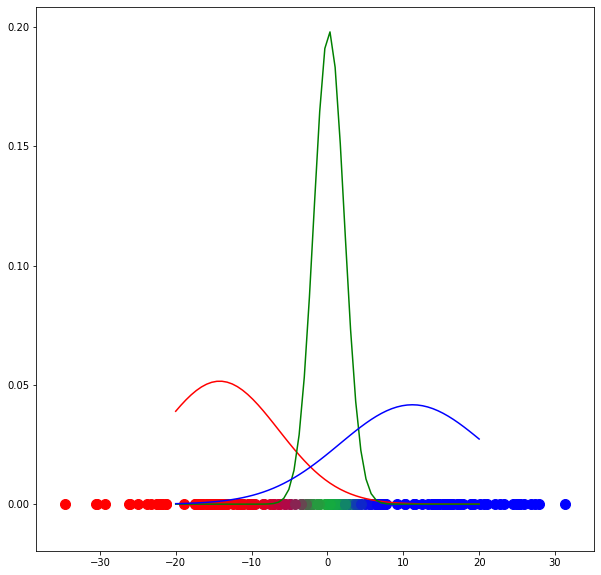

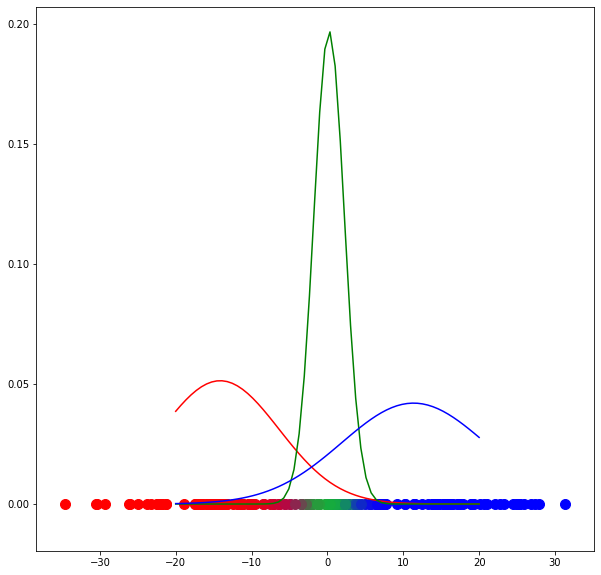

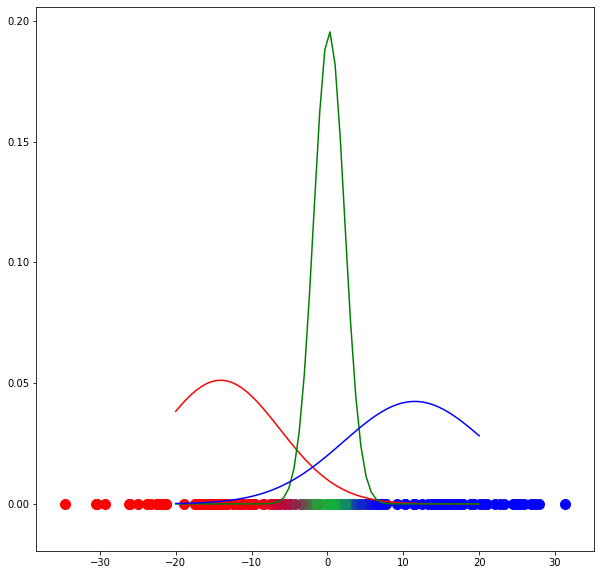

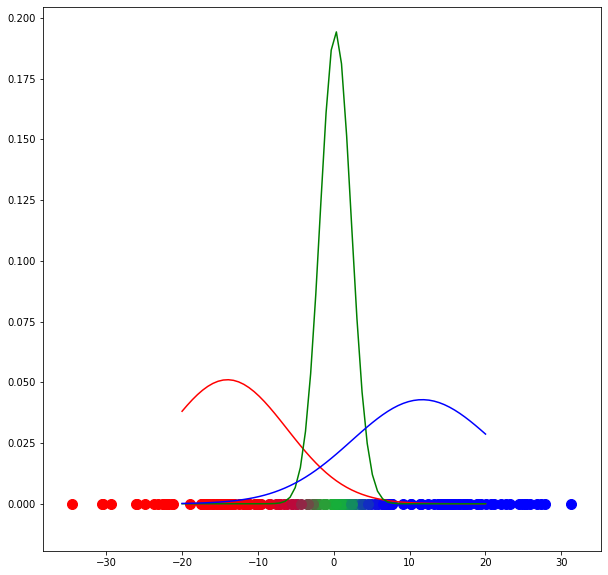

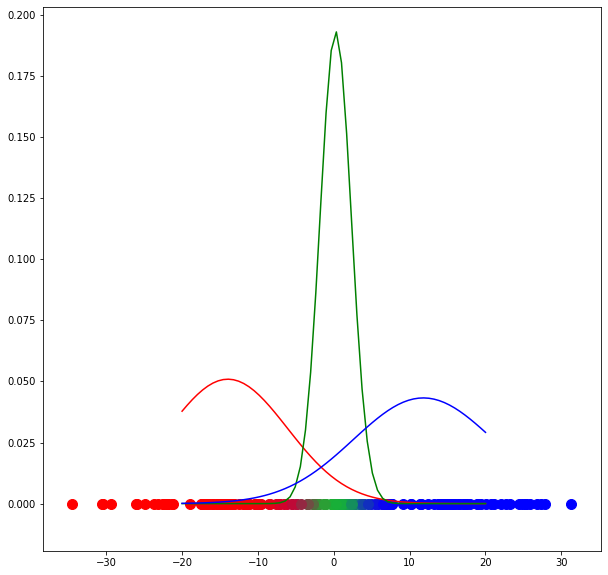

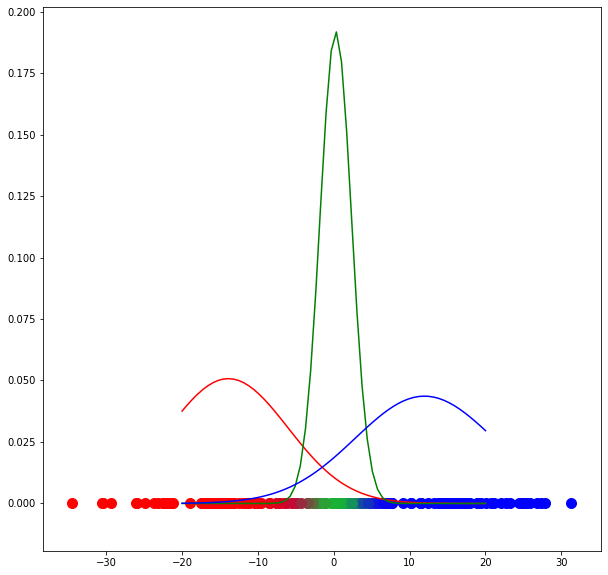

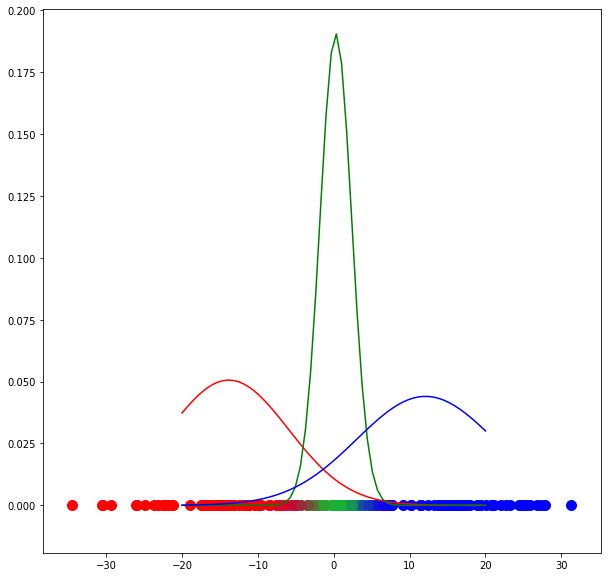

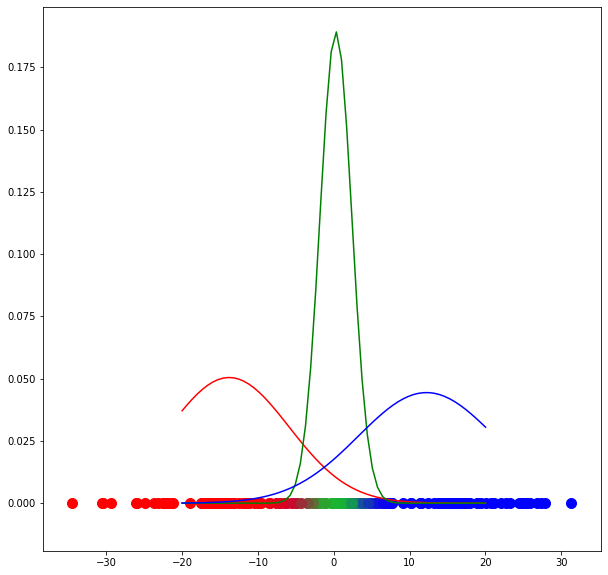

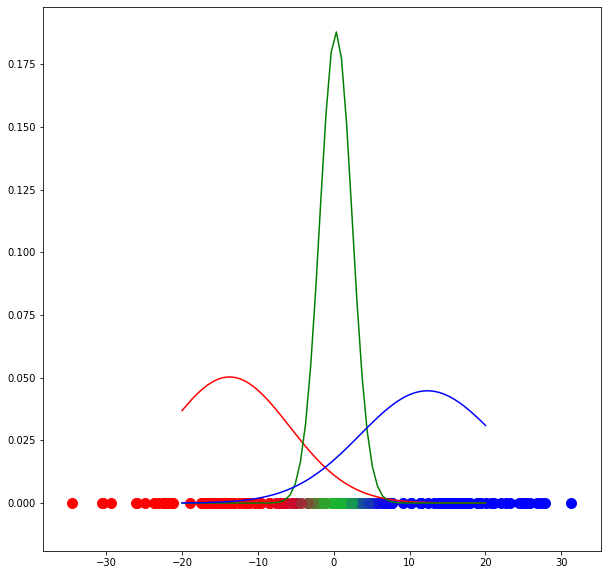

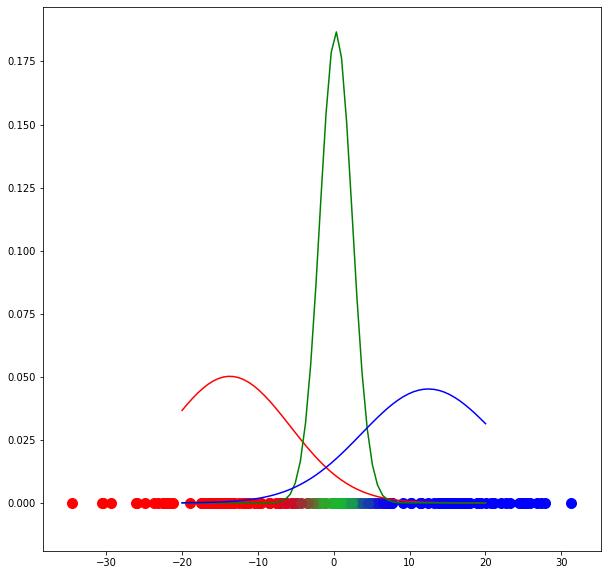

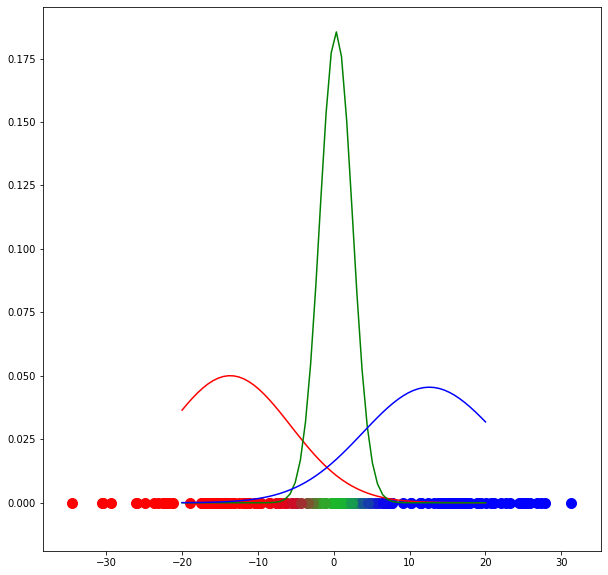

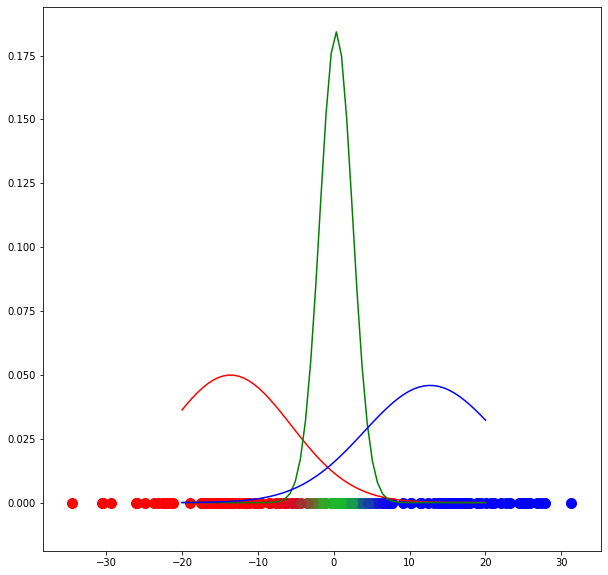

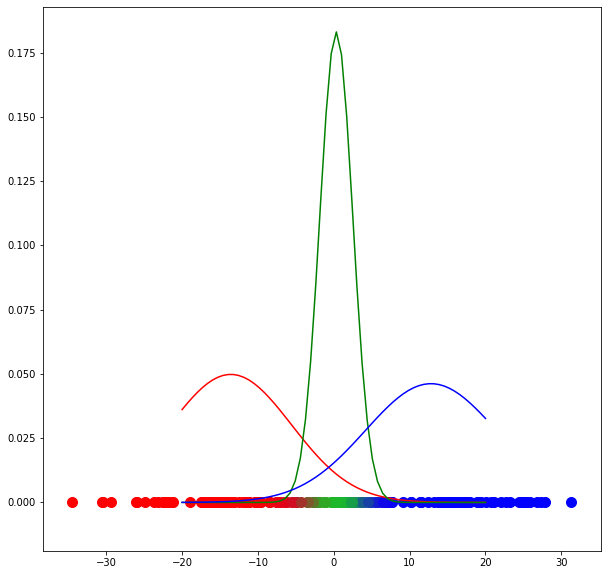

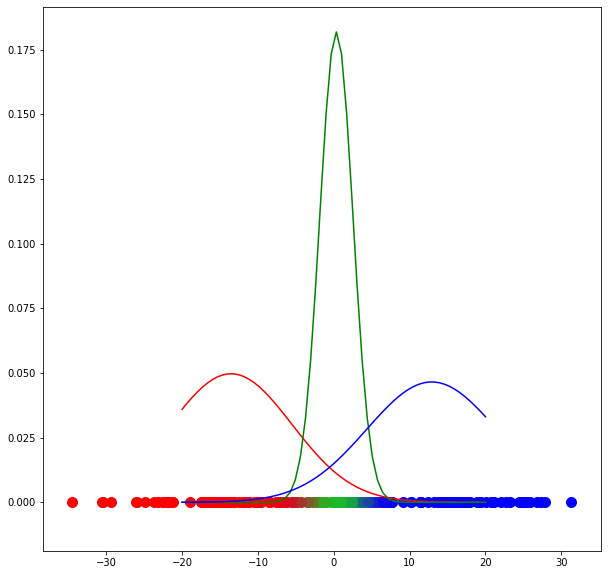

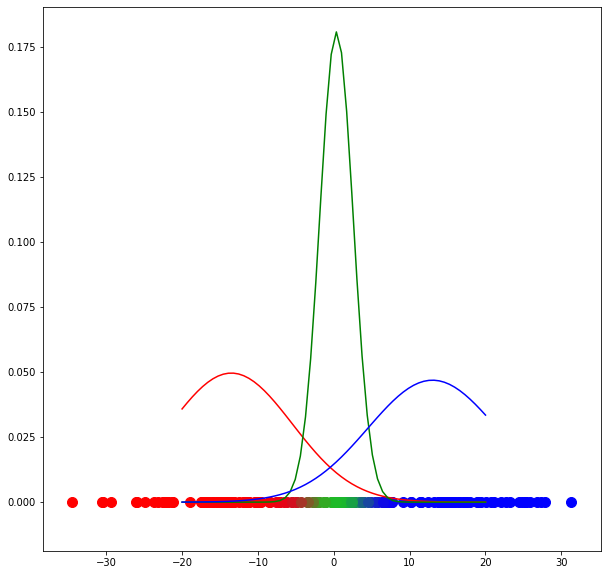

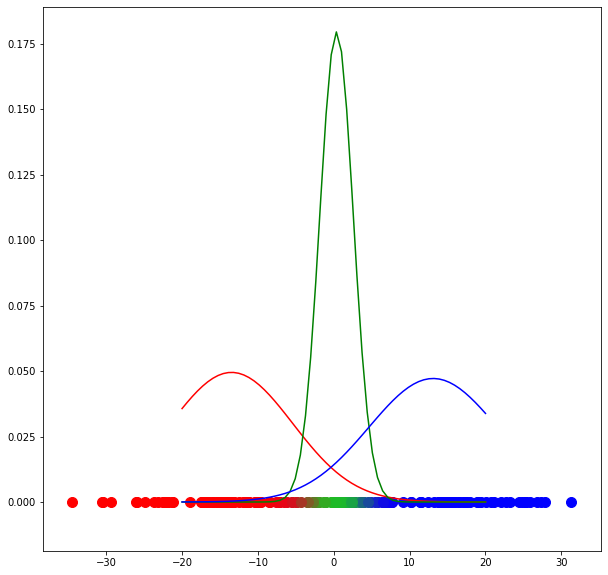

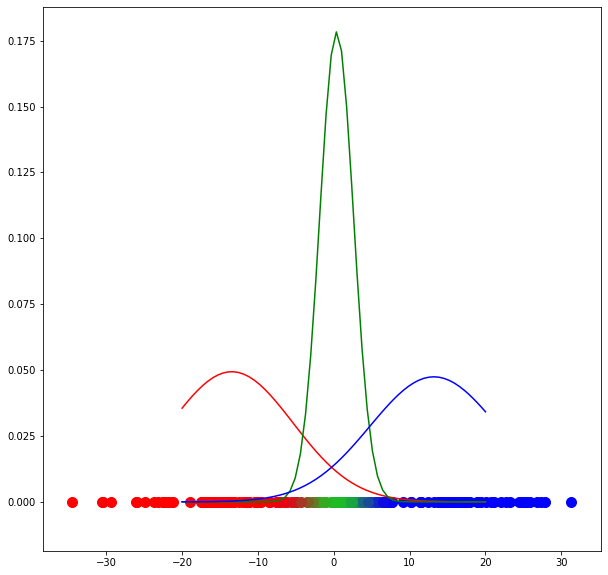

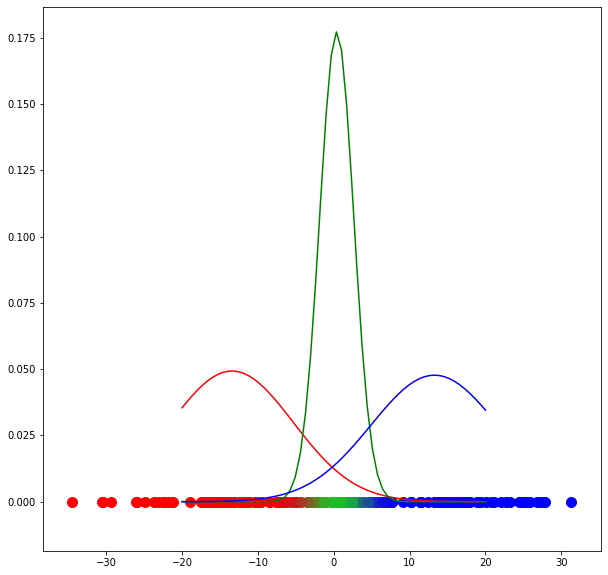

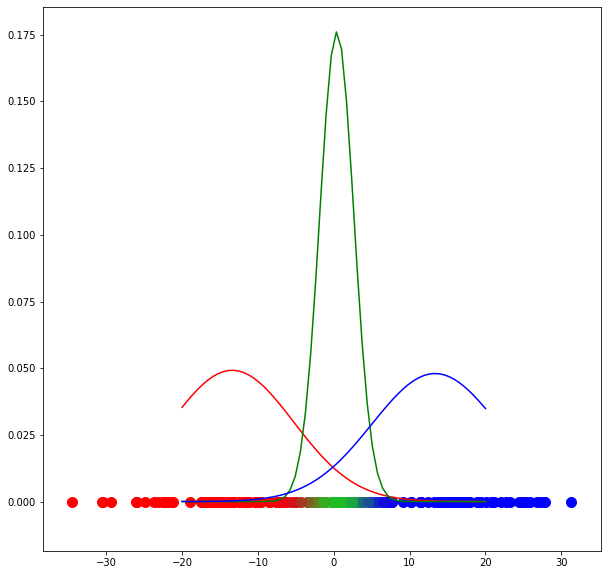

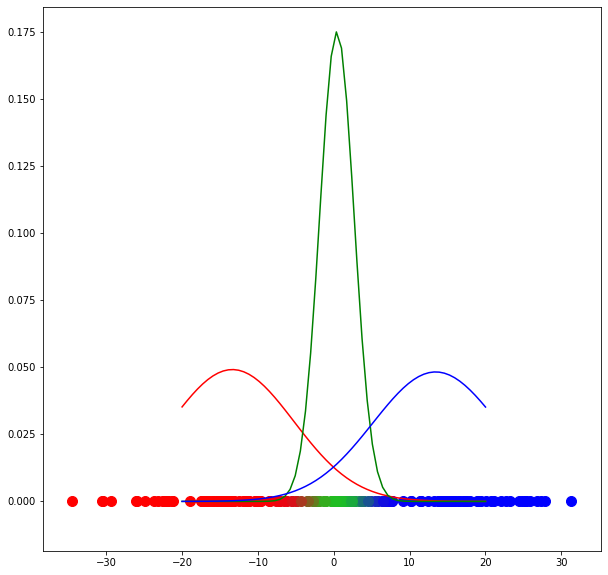

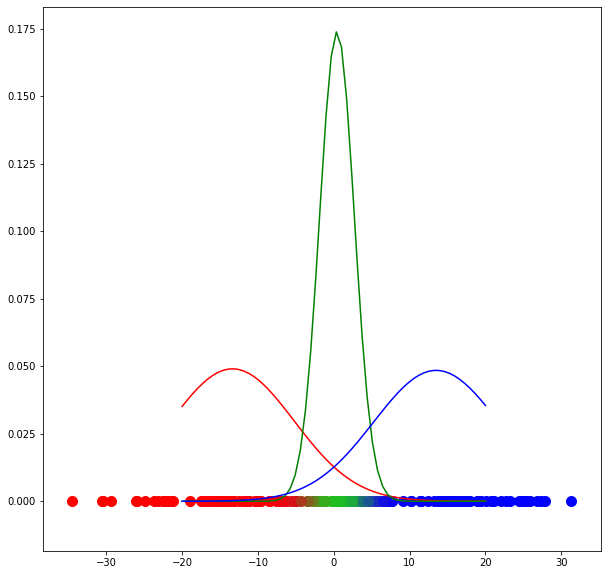

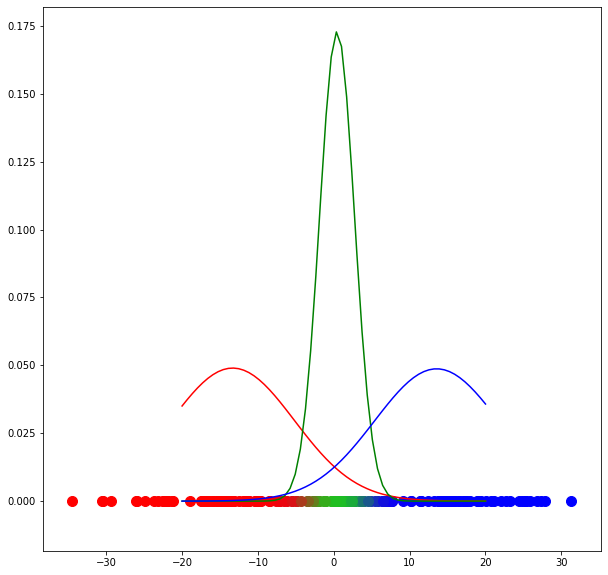

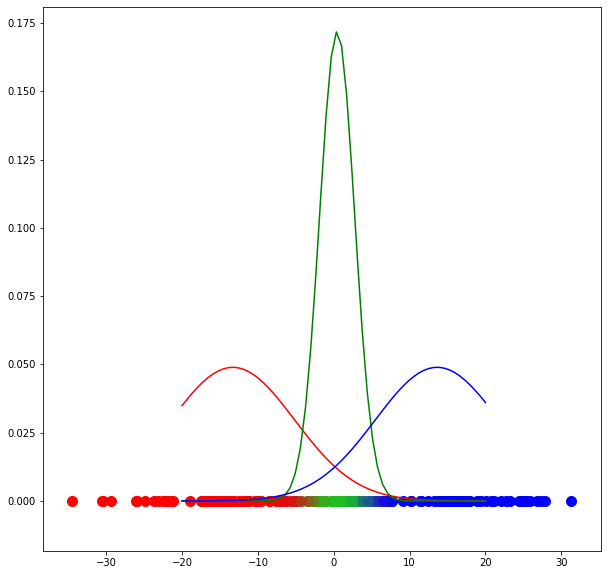

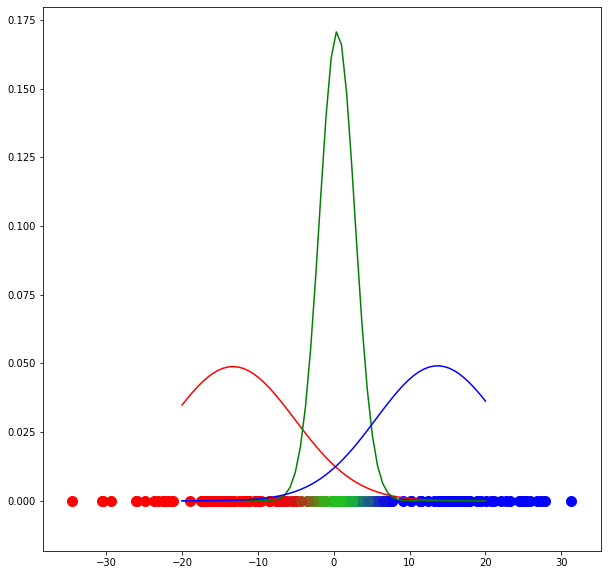

In [11]:
g = GMM1D(data,40,[-10,-3,1],[1/3,1/3,1/3],[1,1,1])
mean,var,log_likelihoods,iterations=g.run()

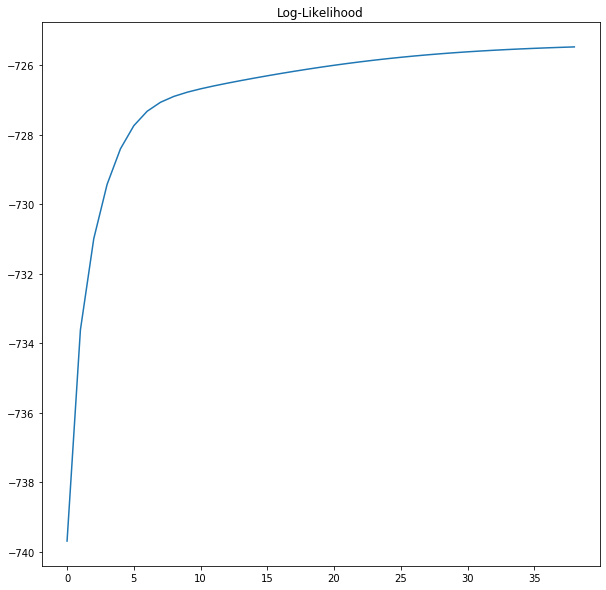

In [12]:
#plotting the loglikelihood graph
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(range(0,iterations-1,1),log_likelihoods[1:])
plt.show()


In [13]:
mean,var

([-13.28297937966499, 0.46440026426922887, 13.738421294272248],
 [8.1691344076657, 2.3475802641911567, 8.082710732523893])

### So, It took around 35 iterations to converge when we have taken mean=[-10,10,2], pi=[1/3,1/3,1/3], var=[1,1,1]